<a target="_blank" href="https://colab.research.google.com/github/umanitoba-meagher-projects/public-experiments/blob/main/jupyter-notebooks/Visualize%20Image%20Information/matplotlib-visualization.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
"""
Authors: Zhenggang Li and Ryleigh J. Bruce
Date: May 14th, 2024

## Purpose: This notebook is a fast.ai ML model
## Note: Note: The authors generated this text in part with GPT-4,
OpenAI’s large-scale language-generation model. Upon generating
draft code, the authors reviewed, edited, and revised the code
to their own liking and takes ultimate responsibility for
the content of this code.
"""


# Introduction

This notebook is designed to provide a structured workflow for visualizing and analyzing structured data, with a focus on animal image classification and associated metadata. The main purpose is to demonstrate how to read, process, and visualize data from Excel files using Python, specifically in the context of wildlife documentation and machine learning projects. The notebook automates several tasks, including mounting Google Drive for file access, importing necessary libraries, defining file paths, reading data into pandas DataFrames, aggregating data, and generating visualizations with matplotlib. The methodology relies on standard data science tools such as pandas for data manipulation and matplotlib for plotting, with openpyxl used for Excel file handling. The workflow is modular, allowing users to adapt the code for different datasets or analytical objectives by modifying variables or code blocks. The notebook includes examples of grouping and aggregating data, as well as generating bar and line plots to visualize trends and distributions. The benefits of this approach include streamlined data exploration, reproducibility, and the ability to quickly generate informative plots for quality control, exploratory analysis, or reporting. The notebook is intended for users who require a straightforward, script-based approach to data visualization and is structured to support both educational and practical applications in fields such as wildlife documentation, spatial analysis, and architectural studies. The code and markdown cells are organized to facilitate understanding and adaptation, making it suitable for a range of users from beginners to those with more advanced data analysis needs.

# Critical Uses & Adaptability

## What the Notebook Can Be Used For:

- **Dataset Exploration:**
  - Enables users to read, aggregate, and visualize data from Excel files, supporting initial exploration and identification of patterns or trends in the dataset. The grouping and plotting steps, such as those using pandas `groupby` and matplotlib, are central to this process.

- **Educational Purposes & Demonstrations:**
  - Functions as a practical example for those learning about Python scripting, data manipulation, and visualization. The notebook demonstrates the use of Python code, scripts, and basic machine learning concepts in working with image-related data, and is suitable for instructional or demonstration purposes.

- **Feature Extraction:**
  - Provides a basis for extracting features from structured datasets, such as aggregating counts or identifying relationships between variables. The modular design allows for the addition of further code blocks for more advanced feature engineering or integration with machine learning workflows.

## How the Notebook Can Be Adapted:

- **Integration with Spatial Design & Architectural Studies:**
  - The workflow can be adapted for spatial analysis or architectural projects by substituting the dataset with information relevant to site analysis, spatial features, or architectural elements. Aggregation and visualization steps can be used to review and document spatial or design-related data.

- **Variables & Customization:**
  - Key variables, such as `file_path` and column names used in grouping or plotting, are defined in dedicated code blocks. Users can modify these parameters to adjust the source data, variables of interest, and the type of plots generated, tailoring the workflow to specific project requirements.

- **Swapping Datasets:**
  - To use a different dataset, change the `public_doi` variable in the Borealis Data Repository Integration section to point to a different dataset DOI. For local files, replace the entire Borealis section with a simple `file_path = './your_file.xlsx'` assignment. This allows for straightforward adaptation to new data sources without altering the core logic of the notebook.

- **Scalability:**
  - The approach is scalable to larger or more complex datasets by adjusting aggregation and plotting parameters. The use of standard Python libraries ensures compatibility with a wide range of data formats and sizes. Additional automation or integration with machine learning models can be incorporated as needed.

## Module: Borealis Data Repository Integration

The following code sets up access to the Borealis data repository to download the required Excel file containing animal data. Borealis is a public data repository that hosts datasets without requiring authentication. The data is hosted in the University of Manitoba Dataverse (https://borealisdata.ca/dataverse/manitoba), a research data repository. The images used in this notebook were collected as part of the 'Understanding Animals' project at University of Manitoba Faculty of Architecture, online at Wild Winnipeg and Teaching with Images.

In [6]:
import requests
import zipfile
import os

BOREALIS_SERVER = "https://borealisdata.ca"

def get_public_dataset_info(persistent_id):
    """
    Get information about a public dataset
    """
    url = f"{BOREALIS_SERVER}/api/datasets/:persistentId/"
    params = {"persistentId": persistent_id}

    response = requests.get(url, params=params)

    if response.status_code == 200:
        dataset_info = response.json()
    else:
        print(f"Cannot access dataset: {response.status_code}")
        return None

    # Access the list of files from the dataset_info dictionary
    files_list = dataset_info['data']['latestVersion']['files']

    # Create an empty list to store file information
    file_info_list = []

    # Iterate through the files list and append file ID and filename to the list
    for file_info in files_list:
        file_id = file_info['dataFile']['id']
        filename = file_info['dataFile']['filename']
        file_info_list.append({"file_id": file_id, "filename": filename})

    return file_info_list

def download_public_file(file_id, expected_filename, save_path="./"):
    """
    Download a specific public file from a dataset by its file ID
    No authentication required - with improved filename handling
    """
    url = f"{BOREALIS_SERVER}/api/access/datafile/{file_id}"

    response = requests.get(url, stream=True)

    if response.status_code == 200:
        # Try to get filename from headers first
        filename = None
        if "Content-Disposition" in response.headers:
            cd = response.headers["Content-Disposition"]
            if "filename=" in cd:
                filename = cd.split("filename=")[1].strip('"')

        # If no filename from headers, use the expected filename
        if not filename:
            filename = expected_filename

        file_path = os.path.join(save_path, filename)

        with open(file_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)

        print(f"✅ File downloaded to {file_path}")
        return file_path
    else:
        print(f"❌ Error {response.status_code}: File may be restricted or not found")
        return None

# Initialize Borealis dataset access
public_doi = "doi:10.5683/SP3/H3HGWF"

# Download the combined_animals.xlsx file
print("Getting dataset information...")
dataset_files = get_public_dataset_info(public_doi)

excel_file_id = None
target_filename = 'combined_animals.xlsx'

for file_info in dataset_files:
    if file_info['filename'] == target_filename:
        excel_file_id = file_info['file_id']
        break

if excel_file_id:
    print(f"Downloading {target_filename}...")
    downloaded_file = download_public_file(excel_file_id, target_filename, "./")

    # Set the file path based on what was actually downloaded
    if downloaded_file:
        file_path = downloaded_file
        print(f"File ready at: {file_path}")
    else:
        print("❌ Download failed")
else:
    print(f"❌ Could not find {target_filename} in the dataset")

Getting dataset information...


ConnectTimeout: HTTPSConnectionPool(host='borealisdata.ca', port=443): Max retries exceeded with url: /api/datasets/:persistentId/?persistentId=doi%3A10.5683%2FSP3%2FH3HGWF (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7d467948afc0>, 'Connection to borealisdata.ca timed out. (connect timeout=None)'))

This line of code establishes the variable `file_path` to reference the locally downloaded Excel file from the Borealis dataset more efficiently in the following modules.

In [ ]:
# File path for the downloaded Excel file
file_path = './combined_animals.xlsx'

# Generating a Graph using Data From an Excel File

## Module: Import Relevant Python Libraries

In this module, we use the `pip` package installer to install the `openpyxl` package, a Python library that is used to easily handle Excel files in Python. This will allow us to write code that will visualize the structured data within an Excel document later on.

In [ ]:
!pip install openpyxl

In this module, the `pandas` and `matplotlib.pyplot` libraries are imported under aliases that are more easily recalled in subsequent code. The `pandas` library provides tools that allow for working with structured data, and the `matplotlib.pyplot` library is a plotting library that allows for the creation of visualizations of structured data such as graphs and plots.

In [ ]:
#Import the pandas and matplotlib libraries using aliases
import pandas as pd
import matplotlib.pyplot as plt

## Module: Using Panda Library to Read an Excel File

The module below uses the alias `pd` that was established in the previous module to reference the `pandas` library. The `pd.read_excel()` function is used to read data from the file found in the `variable file_path`, and the `engine='openpyxl'` argument specifies that the `'openpyxl'` engine should be used to read the Excel file. This grants the script access to the data located within the Excel spreadsheet.

In [ ]:
# Read Excel file
df = pd.read_excel(file_path, engine='openpyxl')

## Module: Creating a DataFrame and Aggregating Data Using the Pandas Library

The following line of code creates the DataFrame `species_sightings`, which groups together rows found in the SpeciesList column consisting of the same value. This allows the script to use the `sum()` function to aggregate the associated values in the SpeciesCount in order to determine the total number of sightings per species in the SpeciesList column.

In [ ]:
#Process the data to get total sightings for each species
species_sightings = df.groupby('SpeciesList')['SpeciesCount'].sum().reset_index()

## Module: Plotting a Graph Using Extracted Structured Data

The following module uses functions found within the matplotlib.pyplot library to plot a graph using the extracted data.

Using the `figsize` attribute the script creates a figure that is ten inches wide and six inches tall to plot the graph within. The script then specifies that the bar chart must be created using the SpeciesList category and associated SpeciesCount values found within the `species_sightings` DataFrame. The color of the bar chart is specified using the `color` parameter.

The desired title for the bar graph is then set, as well as the x-axis and y-axis labels which will aid in graph legibility. The x-axis labels are rotated 45 degrees and are aligned to the right of the x-axis ticks to further enhance legibility.

The line plt.tight_layout() automatically adjusts the layout of the bar graph to ensure it fits nicely within the given 10" x 6" figure.

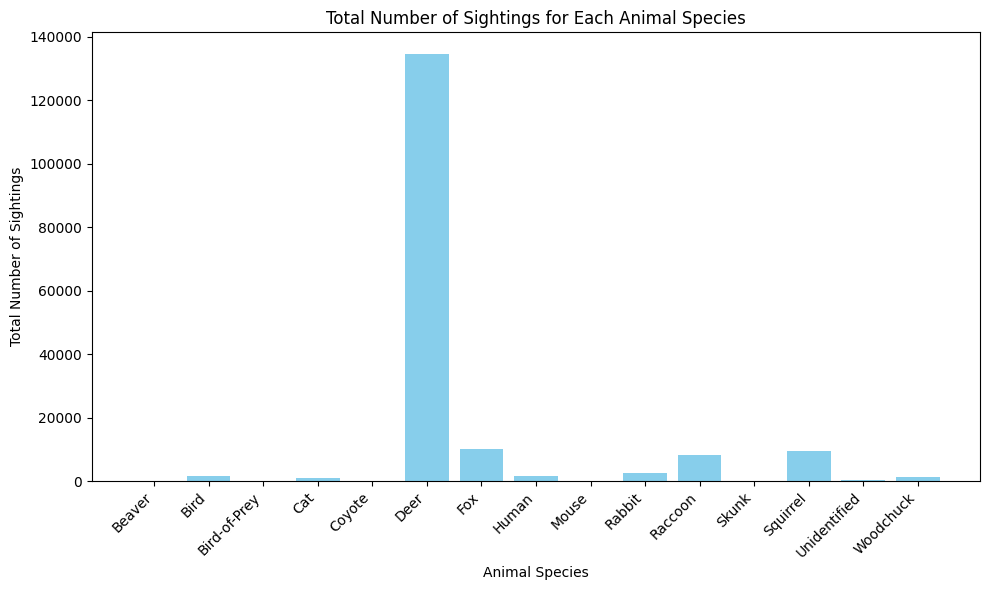

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(species_sightings['SpeciesList'], species_sightings['SpeciesCount'], color='skyblue')

# Adding titles and labels
plt.title('Total Number of Sightings for Each Animal Species') #adjust to the desired title name
plt.xlabel('Animal Species') #adjust to desired x-axis label
plt.ylabel('Total Number of Sightings') #adjust to desired y-axis label
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# Manipulating Exisiting Code to Generate Additional Graphs

Now that a base module of code has been established for generating graphs,  a variety of graphs can be produced by altering simple values within the code.

The following line of code creates a `species_sightings` Dataframe grouped around the MoonPhase column in the datasheet by changing the `'SpeciesList`' string to `'MoonPhase'`.

In [ ]:
#Determine the total number of species sightings during each moon phase
species_sightings = df.groupby('MoonPhase')['SpeciesCount'].sum().reset_index()

Since the `matplotlib.pyplot` library was imported previously, the script has access to the production of a range of plotting methods (an extensive list may be found [here](https://matplotlib.org/stable/plot_types/index.html)). To alter the type of plot being produced, simply change the `bar()` function in the second line of the module below to the desired plot type. In this example, it has been changed to `plot()`.

Graph color can also be altered by changing the value of the `color` parameter to the desired color's name or hexadecimal code. In this example, it has been changed from `'skyblue'` to `'#CCCCFF'`, the hexadecimal code for periwinkle.

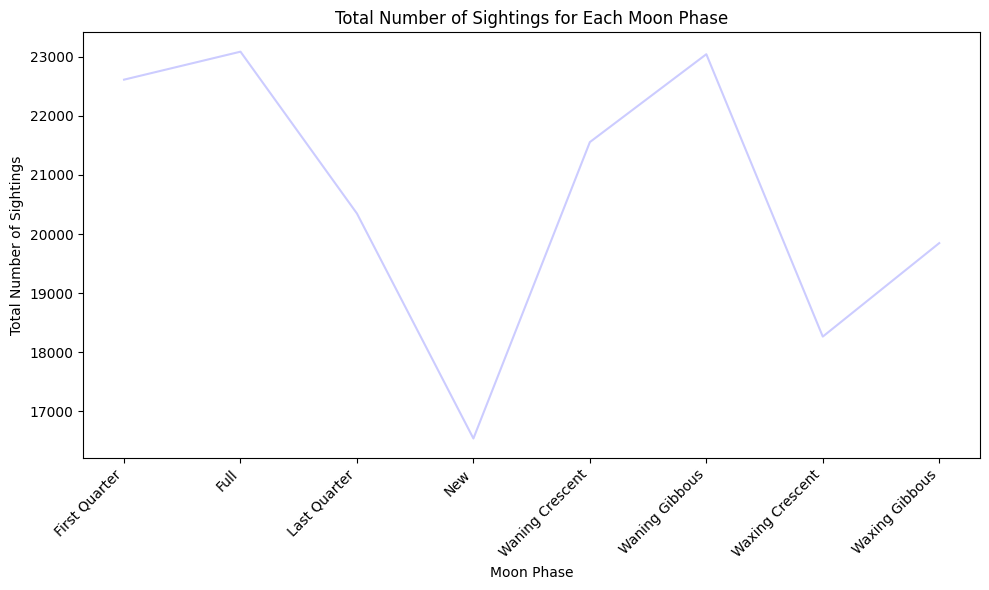

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(species_sightings['MoonPhase'], species_sightings['SpeciesCount'], color='#CCCCFF')

# Adding titles and labels
plt.title('Total Number of Sightings for Each Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Total Number of Sightings')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()